**Retrieval-Augmented Generation (RAG)** is an advanced method in AI that combines retrieval mechanisms with generative models to enhance the capabilities of large language models (LLMs). The main idea behind RAG is to empower LLMs to access external information that they weren’t initially trained on, thus providing them with up-to-date and contextually relevant data for more accurate and informative responses.

### Key Components of RAG:

1. **LLMs (Large Language Models):** These are the backbone of RAG systems. The LLM processes the input, determines what additional context might be needed, and ultimately generates the response. Popular models include GPT, BERT, and others.

2. **Retrieval Model:** This component searches a database or knowledge source for relevant information based on the input query. The information retrieved is then used to augment the LLM’s response. This database is often a vector database where documents are stored as embeddings (numerical representations of text).

3. **Vector Database:** In RAG, a vector database stores the encoded chunks of text. When a query is processed, the retrieval model searches this vector database to find the most semantically relevant pieces of information.

4. **Controller or Orchestrator:** This component manages the flow of data between the LLM and the retrieval model. It decides when to fetch additional information, how to incorporate it into the prompt, and manages the generation process.

### Example of RAG in Action:

Imagine you are building a chatbot for a company selling running shoes. When a user asks a specific question about a product, the RAG system doesn’t rely solely on the LLM’s training data. Instead, it first retrieves the most relevant information about that product—such as care instructions, sizing details, or customer reviews—from a pre-defined database. This information is then used to craft a precise and informed response, ensuring that the chatbot provides accurate and up-to-date information.

### Benefits of RAG:

- **Enhanced Accuracy:** By integrating current external data, RAG systems generate responses that are more accurate and reflect the latest information.
- **Dynamic Content:** The ability to continuously update the external data sources ensures that the responses evolve with new information.
- **Expanded Knowledge Base:** RAG systems are not limited by the static training data of the LLM, allowing for a broader and deeper range of responses.

### Practical Application: Building a RAG System for PDF Reading

To implement a real-world RAG application that reads PDFs, you can follow these steps:

1. **Data Preparation:** Convert the PDF content into chunks of text and store them in a vector database.
2. **Text Embedding:** Use a model like BERT to convert these chunks into embeddings.
3. **Retrieval Mechanism:** When a query is made, retrieve the most relevant text chunks based on the query.
4. **Augment and Generate:** Feed the retrieved information to the LLM along with the query to generate a response.

Incorporating RAG into your AI system not only enhances its ability to provide contextually rich responses but also keeps the AI system dynamic and informed with the latest data, making it a robust solution for applications requiring up-to-date information.




---



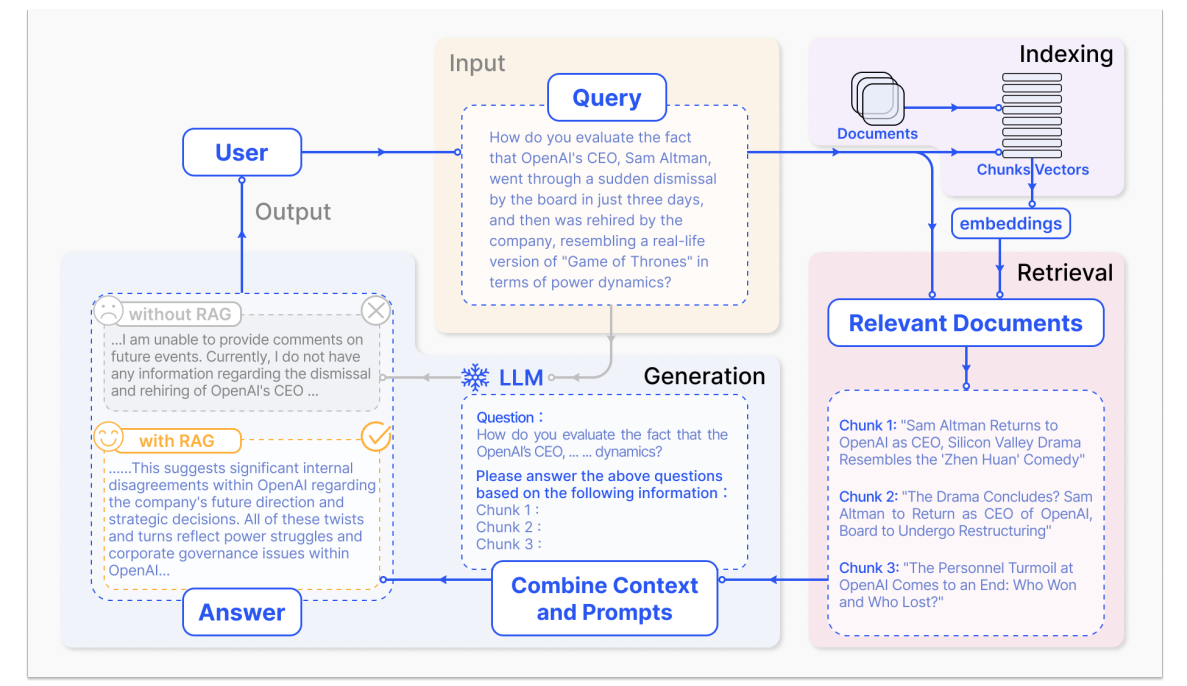

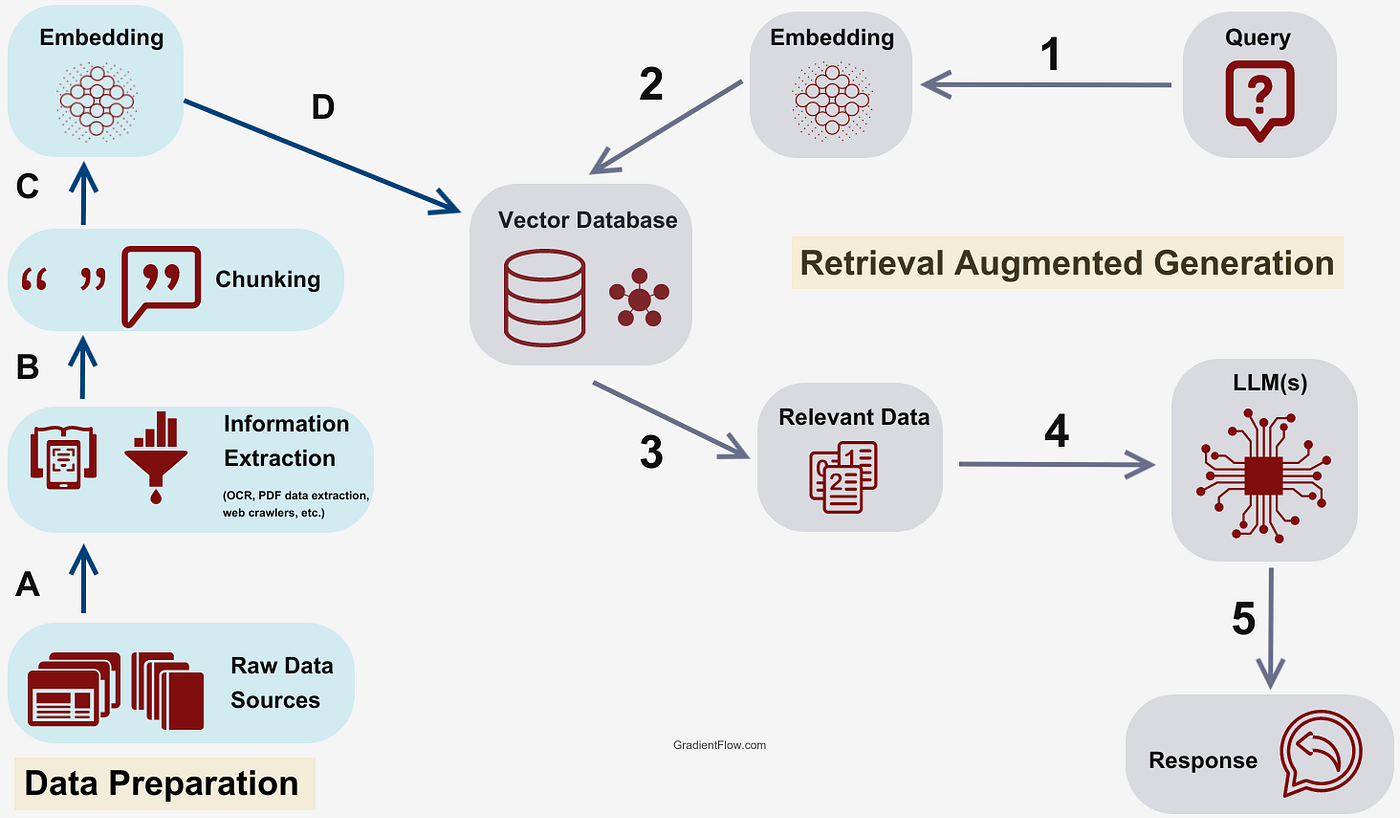



---



### Chunking Strategies

**What is Chunking?**

Chunking, also known as text segmentation or splitting, is a technique used in Natural Language Processing (NLP) to break down large bodies of text into smaller, more manageable pieces (chunks). These smaller chunks help in processing large documents, making them easier to understand and analyze by NLP models, especially for tasks like summarization, text classification, and question answering.

In practical applications, chunking is used for tasks like Named Entity Recognition (NER), sentiment analysis, and machine translation, where you need to extract meaningful portions of text. Chunking is essential when working with models like transformers, where processing long sequences is computationally expensive or not feasible due to token limits.

---

### Key Chunking Strategies

1. **Fixed-Length Chunking (Token-Based)**:
   In this method, a text is split into chunks based on a fixed number of tokens (words or subwords). This is common for models like GPT and BERT, where token limits are imposed (e.g., 512 tokens in BERT).

   **Advantages**:
   - Simplicity.
   - Direct control over the chunk size.

   **Challenges**:
   - Chunks may split sentences or paragraphs, leading to loss of contextual information.
   - Post-processing may be needed to avoid cutting mid-sentence.

   **Example**:
   ```
   "The quick brown fox jumps over the lazy dog."
   Fixed-length token chunk: ["The quick brown", "fox jumps over", "the lazy dog."]
   ```

2. **Sentence-Based Chunking**:
   In this approach, the text is split based on sentence boundaries, ensuring that each chunk contains complete sentences. Sentence tokenizers like those in **spaCy** or **NLTK** are commonly used.

   **Advantages**:
   - Preserves semantic meaning by maintaining sentence integrity.
   - Helps in tasks like summarization and translation where complete thoughts are necessary.

   **Challenges**:
   - May produce uneven chunk sizes.
   - Can still exceed model token limits if sentences are too long.

   **Example**:
   ```
   Input: "Natural language processing is important. It helps machines understand human language."
   Sentence-based chunk: ["Natural language processing is important.", "It helps machines understand human language."]
   ```

3. **Sliding Window Chunking**:
   Sliding window chunking works by creating overlapping chunks where a portion of the previous chunk is repeated in the next. This allows the model to maintain context across chunks and avoid the loss of critical information at boundaries.

   **Advantages**:
   - Reduces information loss at the boundaries.
   - Works well in maintaining continuity, especially in long-form texts.

   **Challenges**:
   - Increased computational cost due to overlap.
   - Redundant processing of overlapping sections.

   **Example**:
   ```
   Text: "Chunking strategies are useful in NLP. They make text easier to process. Sliding windows help retain context."
   Sliding Window Chunks:
   1. ["Chunking strategies are useful in NLP.", "They make text easier to process."]
   2. ["They make text easier to process.", "Sliding windows help retain context."]
   ```

4. **Semantic Chunking**:
   This approach leverages the underlying meaning of the text to define chunk boundaries. Models that understand text semantics (like those using **BERT** embeddings) can detect the topic changes in paragraphs or sections and split the text accordingly.

   **Advantages**:
   - Maintains coherence by ensuring that related information stays together.
   - Ideal for complex tasks like summarization or long-form question-answering.

   **Challenges**:
   - Requires sophisticated models and algorithms to detect boundaries based on meaning.
   - Higher computational cost.

   **Example**:
   ```
   Input: "NLP helps machines understand language. It is a growing field in AI. Machine translation is one application of NLP."
   Semantic chunking:
   1. ["NLP helps machines understand language. It is a growing field in AI."]
   2. ["Machine translation is one application of NLP."]
   ```

5. **POS-Based Chunking (Part-of-Speech Tagging)**:
   Chunking based on part-of-speech tagging can extract meaningful phrases like noun phrases (NP) or verb phrases (VP). This method segments the text according to grammatical structure, making it useful in syntactic parsing.

   **Advantages**:
   - Extracts syntactically coherent units.
   - Useful for tasks like Named Entity Recognition (NER).

   **Challenges**:
   - Requires an accurate POS tagger.
   - May produce smaller chunks that don’t cover long contexts.

   **Example**:
   ```
   Text: "The quick brown fox jumps over the lazy dog."
   POS-based Chunk: [("The quick brown fox", "NP"), ("jumps over", "VP"), ("the lazy dog", "NP")]
   ```

---

### Python Implementation Example: Sentence-Based Chunking

```python
import nltk
from nltk.tokenize import sent_tokenize

# Sample text
text = """
Natural language processing is a crucial field in artificial intelligence.
It helps machines understand human language. Applications include machine translation, chatbots, and more.
"""

# Download NLTK tokenizer data (only needed once)
nltk.download('punkt')

# Split text into sentences
sentences = sent_tokenize(text)

# Display sentence chunks
for i, sentence in enumerate(sentences):
    print(f"Chunk {i+1}: {sentence}")
```

---

### Python Implementation: Sliding Window Chunking

```python
def sliding_window_chunking(text, window_size=50, overlap=10):
    words = text.split()
    chunks = []
    
    for i in range(0, len(words), window_size - overlap):
        chunk = words[i:i + window_size]
        chunks.append(" ".join(chunk))
    
    return chunks

# Example
text = "Natural language processing helps machines understand language. It is a growing field in AI. Machine translation is one application of NLP."

chunks = sliding_window_chunking(text, window_size=10, overlap=3)

for idx, chunk in enumerate(chunks):
    print(f"Chunk {idx+1}: {chunk}")
```

---



In Retrieval-Augmented Generation (RAG), **chunking strategy** is a critical factor that influences the quality of both retrieval and generation processes. Chunking is the process of breaking down long documents into smaller, manageable pieces to facilitate better retrieval. For RAG systems, the best chunking strategy should balance accuracy, relevance, and efficiency.

### Best Chunking Strategy for RAG

1. **Fixed-Length Chunking (Window-based Chunking)**:
   - **What it is**: Splits text into fixed-size chunks, such as 512 tokens, often used with transformer models like BERT or GPT. The size is typically determined based on the model’s token limit.
   - **Advantages**:
     - Simple to implement.
     - Works well with transformer-based models with a token limit.
   - **Disadvantages**:
     - Might split important context in the middle of a sentence or paragraph.
     - May lead to overlapping or redundant information across chunks, which can cause inefficiencies in retrieval.
   - **Best Use Case**: When processing long documents like research papers, where each chunk may provide independent and meaningful context.

2. **Semantic Chunking**:
   - **What it is**: Uses semantic boundaries like paragraphs, sentences, or discourse units to divide the text. Natural language understanding models (e.g., sentence boundary detectors) are used to ensure chunks are split at meaningful points.
   - **Advantages**:
     - Maintains the contextual integrity of the information.
     - Helps preserve important semantic relationships between chunks.
   - **Disadvantages**:
     - May lead to uneven chunk lengths, potentially causing issues with models that have fixed token limits.
   - **Best Use Case**: For tasks where maintaining the integrity of each idea or topic is essential, such as customer support data or legal documents.

3. **Sliding Window with Overlapping**:
   - **What it is**: This method involves creating chunks with a fixed window but allowing overlap between consecutive chunks. For instance, if chunk size is 512 tokens, the next chunk might start at the 400th token to overlap with the previous chunk.
   - **Advantages**:
     - Reduces the chance of losing contextual information at the boundary of chunks.
     - Ensures that overlapping content is retrieved and relevant connections between chunks are preserved.
   - **Disadvantages**:
     - Leads to redundancy, requiring more storage and computational overhead.
     - May introduce repeated or redundant information in the retrieval step.
   - **Best Use Case**: Works well when dealing with structured, flowing content like news articles or narrative stories where context is crucial.

4. **Hybrid Chunking (Combination of Semantic and Window-based)**:
   - **What it is**: A hybrid strategy that combines semantic chunking with fixed window size. First, the document is broken down based on semantic units (paragraphs, sentences), and if a chunk exceeds the token limit, it is further split using fixed window sizes.
   - **Advantages**:
     - Preserves both semantic context and ensures compatibility with token-limited models.
     - Ensures that chunks do not exceed the token limits of transformer-based models.
   - **Disadvantages**:
     - Complexity in implementation.
   - **Best Use Case**: When using RAG systems that require both semantic context and efficient retrieval from large databases or long documents (e.g., technical documentation, product manuals).

5. **Query-Based Chunking**:
   - **What it is**: Breaks down documents based on potential user queries or topics, ensuring that each chunk is focused on answering a specific question or topic.
   - **Advantages**:
     - Highly relevant to the retrieval task, as chunks are designed with queries in mind.
     - Optimizes retrieval efficiency for FAQ-style or knowledge-based RAG systems.
   - **Disadvantages**:
     - Requires prior knowledge of user queries or topics.
     - Might be difficult to generalize across different domains or datasets.
   - **Best Use Case**: Ideal for FAQ systems or customer service tasks, where questions are known beforehand and retrieval can be fine-tuned.

---

### Practical Example: Sliding Window with Overlapping in RAG

Let’s implement a basic Python example that demonstrates sliding window chunking with overlapping for RAG tasks:

```python
def sliding_window_chunking(text, window_size=50, overlap_size=10):
    tokens = text.split()  # Tokenize text into words or subwords.
    chunks = []
    start = 0

    while start < len(tokens):
        end = min(start + window_size, len(tokens))
        chunk = tokens[start:end]
        chunks.append(" ".join(chunk))
        start += window_size - overlap_size  # Slide window with overlap.

    return chunks

# Sample text (replace with a longer document if needed)
text = '''Artificial intelligence (AI) has seen tremendous growth over the last decade. From simple chatbots to advanced neural networks, AI has integrated itself into almost every industry. One of the key advancements is in Natural Language Processing (NLP), which allows machines to understand, interpret, and generate human language.

NLP models like GPT-3 and BERT have revolutionized how we interact with technology, making it possible to generate coherent and contextually accurate text. These models rely on massive datasets and intricate architectures to achieve their impressive performance.

Another major milestone in AI development is the rise of computer vision. Using deep learning models, computers can now recognize objects, people, and even emotions from images. Applications of computer vision range from autonomous driving to facial recognition, improving both accuracy and safety in various sectors.

Despite these advancements, AI still faces significant challenges. Ethical concerns, data privacy issues, and the black-box nature of many AI systems remain prominent. As AI continues to evolve, it will be essential to address these concerns to ensure responsible and beneficial development.'''

# Apply chunking
chunks = sliding_window_chunking(text)

for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}: {chunk}\n")
```

In this example:
- The `window_size` defines the maximum number of tokens per chunk.
- The `overlap_size` ensures that consecutive chunks overlap by a certain number of tokens to preserve contextual information.

---

### Best Strategy for RAG

For most **RAG applications**, the **Hybrid Chunking** approach is often the best strategy:
- It preserves **semantic meaning** while ensuring that chunks are of a manageable size for retrieval and generation tasks.
- Hybrid approaches ensure that no essential context is lost, while also being flexible for handling long documents.

However, the best strategy may vary depending on the specific task, model architecture, and available computational resources. If fine-grained contextual understanding is crucial, a **Semantic Chunking** strategy might be preferable. For highly structured content, **Sliding Window with Overlapping** is often used to ensure no loss of context.



In [ ]:
def sliding_window_chunking(text, window_size=50, overlap_size=10):
    tokens = text.split()  # Tokenize text into words or subwords.
    chunks = []
    start = 0

    while start < len(tokens):
        end = min(start + window_size, len(tokens))
        chunk = tokens[start:end]
        chunks.append(" ".join(chunk))
        start += window_size - overlap_size  # Slide window with overlap.

    return chunks

# Sample text (replace with a longer document if needed)
text = '''Artificial intelligence (AI) has seen tremendous growth over the last decade. From simple chatbots to advanced neural networks, AI has integrated itself into almost every industry. One of the key advancements is in Natural Language Processing (NLP), which allows machines to understand, interpret, and generate human language.

NLP models like GPT-3 and BERT have revolutionized how we interact with technology, making it possible to generate coherent and contextually accurate text. These models rely on massive datasets and intricate architectures to achieve their impressive performance.

Another major milestone in AI development is the rise of computer vision. Using deep learning models, computers can now recognize objects, people, and even emotions from images. Applications of computer vision range from autonomous driving to facial recognition, improving both accuracy and safety in various sectors.

Despite these advancements, AI still faces significant challenges. Ethical concerns, data privacy issues, and the black-box nature of many AI systems remain prominent. As AI continues to evolve, it will be essential to address these concerns to ensure responsible and beneficial development.'''

# Apply chunking
chunks = sliding_window_chunking(text)

for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}: {chunk}\n")


Chunk 1: Artificial intelligence (AI) has seen tremendous growth over the last decade. From simple chatbots to advanced neural networks, AI has integrated itself into almost every industry. One of the key advancements is in Natural Language Processing (NLP), which allows machines to understand, interpret, and generate human language. NLP models like

Chunk 2: to understand, interpret, and generate human language. NLP models like GPT-3 and BERT have revolutionized how we interact with technology, making it possible to generate coherent and contextually accurate text. These models rely on massive datasets and intricate architectures to achieve their impressive performance. Another major milestone in AI development

Chunk 3: achieve their impressive performance. Another major milestone in AI development is the rise of computer vision. Using deep learning models, computers can now recognize objects, people, and even emotions from images. Applications of computer vision range from autonomou

### What is Tokenization?

**Tokenization** is a fundamental step in natural language processing (NLP) where text is split into smaller units, called "tokens." These tokens can be words, characters, or even subwords, depending on the task and language model in use. Tokenization is essential for machines to process and understand human language because it breaks down continuous streams of text into manageable parts that can be analyzed and processed by algorithms.

---

### Types of Tokenization

There are several methods of tokenization, each with different granularity levels and use cases.

#### 1. **Word-Level Tokenization**
   - **Definition**: Splits text into individual words. This is the most intuitive and straightforward method.
   - **Example**:
     ```
     Input: "Natural Language Processing is fascinating."
     Tokens: ["Natural", "Language", "Processing", "is", "fascinating", "."]
     ```
   - **Advantages**:
     - Easy to implement and understand.
     - Works well for languages where words are clearly separated by spaces.
   - **Challenges**:
     - Struggles with compound words and contractions ("I'm" → ["I", "'m"]).
     - Doesn't handle languages like Chinese or Japanese, where word boundaries are not clear.

#### 2. **Character-Level Tokenization**
   - **Definition**: Breaks down text into individual characters.
   - **Example**:
     ```
     Input: "Hello"
     Tokens: ["H", "e", "l", "l", "o"]
     ```
   - **Advantages**:
     - Can handle misspellings, typos, and rare words more gracefully.
     - Useful in tasks like text generation, where creative combinations of characters may be needed.
   - **Challenges**:
     - Very large sequence lengths (processing long sentences becomes inefficient).
     - Loss of semantic meaning when words are broken into individual characters.

#### 3. **Subword Tokenization (Byte-Pair Encoding, WordPiece)**
   - **Definition**: Breaks text into subword units based on frequency of occurrence, making it an excellent middle ground between word-level and character-level tokenization.
   - **Example**:
     ```
     Input: "unbelievable"
     Tokens: ["un", "##believable"]
     ```
   - **Advantages**:
     - Can handle out-of-vocabulary words by splitting rare or unknown words into known subword units.
     - More efficient than character-level tokenization for long texts.
   - **Popular Implementations**:
     - **Byte-Pair Encoding (BPE)**: Used in models like GPT and OpenAI’s models.
     - **WordPiece**: Used in models like BERT.

#### 4. **Sentence-Level Tokenization**
   - **Definition**: Splits text into individual sentences, which can be further tokenized at the word or subword level.
   - **Example**:
     ```
     Input: "Natural Language Processing is fascinating. It enables machines to understand human language."
     Tokens: ["Natural Language Processing is fascinating.", "It enables machines to understand human language."]
     ```
   - **Advantages**:
     - Useful for higher-level tasks like text summarization or translation.
   - **Challenges**:
     - Requires sentence boundary detection, which can be tricky in languages that lack punctuation or have complex grammar structures.

---

### Tokenization in Machine Learning Models

Many NLP models rely on tokenization to process text data. Let’s look at a few popular tokenization techniques used in prominent machine learning models:

#### 1. **BERT Tokenizer (WordPiece)**
   BERT uses WordPiece tokenization, where frequent word substrings are used to create tokens. For example, uncommon words are broken down into more frequent subwords, while common words remain as whole tokens.
   - **Example**:
     ```
     Input: "unhappiness"
     Tokens: ["un", "##happiness"]
     ```
   
#### 2. **GPT Tokenizer (Byte-Pair Encoding)**
   GPT (Generative Pretrained Transformer) models use Byte-Pair Encoding (BPE), which starts by tokenizing words and then progressively merges the most frequent pairs of characters or character sequences.
   - **Example**:
     ```
     Input: "natural"
     Tokens: ["na", "tural"]
     ```

#### 3. **SentencePiece (used in T5, ALBERT)**
   SentencePiece treats text as a stream of bytes and is commonly used in models like T5 and ALBERT. It allows tokenization without relying on language-specific preprocessors.
   - **Example**:
     ```
     Input: "Machine learning"
     Tokens: ["▁Machine", "▁learning"]
     ```

---

### Importance of Tokenization

1. **Makes Text Understandable for Models**: Raw text cannot be directly fed into machine learning models, so tokenization serves as a bridge between text and numerical representation.
   
2. **Improves Model Efficiency**: By breaking text into smaller chunks, tokenization reduces the complexity of text, making it easier for models to process efficiently.

3. **Handles Out-of-Vocabulary Words**: Subword tokenizers like Byte-Pair Encoding allow models to handle unknown words by breaking them down into familiar subword units.

---

### Python Example: Using HuggingFace Tokenizers

Here’s an example using HuggingFace’s tokenizer for BERT:

```python
from transformers import BertTokenizer

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize a sample sentence
text = "Natural Language Processing is fascinating!"
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print("Tokens:", tokens)
print("Token IDs:", token_ids)
```

**Output**:
```
Tokens: ['natural', 'language', 'processing', 'is', 'fascinating', '!']
Token IDs: [3426, 1710, 3834, 2003, 4127, 999]
```

In this example:
- **Token IDs** represent the unique IDs assigned to each token by the BERT tokenizer.
- The text is first broken down into tokens and then mapped to IDs, which are fed into the model for further processing.

---

### Challenges in Tokenization

1. **Handling Ambiguity**: Ambiguities in language, like polysemy (multiple meanings of the same word), can cause problems during tokenization, as context may be lost.
   
2. **Efficiency vs. Accuracy**: Some tokenization strategies (e.g., character-level) sacrifice efficiency for accuracy, while others (e.g., word-level) may lose accuracy when encountering complex words.

3. **Language-Specific Issues**: Tokenization becomes tricky for languages like Chinese, where word boundaries are not clearly defined by spaces, or for agglutinative languages like Finnish, where words are composed of multiple morphemes.

---


Tokenization is a critical step in preparing text data for NLP models. Different tasks may require different tokenization strategies, and the choice of tokenizer can significantly impact the performance of a model. Whether it’s word-level, character-level, or subword tokenization, selecting the right method ensures that the model processes the text efficiently and accurately.

---

In [ ]:
from transformers import BertTokenizer

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize a sample sentence
text = "Natural Language Processing is fascinating!"
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print("Tokens:", tokens)
print("Token IDs:", token_ids)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Tokens: ['natural', 'language', 'processing', 'is', 'fascinating', '!']
Token IDs: [3019, 2653, 6364, 2003, 17160, 999]




---
# ***RAG Implementation***


---



In [ ]:
!pip install "langchain" "pypdf<=3.17.0" "faiss-cpu<=1.7.4" "openai>1" "tiktoken<=0.5.1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 602.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.4/277.4 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 702.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install "giskard[llm]" --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 635.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.8/140.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.9 MB/s eta 0:00:00


In [ ]:
!pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.6 MB/s eta 0:00:00


In [ ]:
%%writefile app.py

import streamlit as st
import os
import openai
import pandas as pd
from langchain.chains import RetrievalQA
from langchain.document_loaders import PyPDFLoader
from langchain.prompts import PromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS
#from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.embeddings.openai import OpenAIEmbeddings
import tempfile  # To handle file saving for uploaded PDFs

# Streamlit UI elements for User Profile and Links
st.sidebar.image("/content/Toni.png", width=150)  # Replace with the link to your image or upload an image to Streamlit
st.sidebar.markdown("## [Toni Ramchandani](https://www.linkedin.com/in/toni-ramchandani/)")  # Replace with your LinkedIn profile URL
st.sidebar.markdown("VP - Driving Excellence as Tech Delivery Head")
st.sidebar.markdown("""
A visionary leader and AI Research Engineer with a distinguished career that spans across multiple facets of technology and innovation.
""")

# Title for the app
st.title("QA Assistant for The Project")

# OpenAI API key input
OPENAI_API_KEY = st.text_input("Enter your OpenAI API Key:", type="password")
if OPENAI_API_KEY:
    openai.api_key = OPENAI_API_KEY
    os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

# File uploader for PDF
uploaded_pdf = st.file_uploader("Upload the Requirements PDF", type="pdf")

# Display options
pd.set_option("display.max_colwidth", None)

#LLM_NAME = "gpt-3.5-turbo-instruct"
LLM_NAME = "gpt-4o-mini"

# Updated Prompt Template to reflect the new use case
PROMPT_TEMPLATE = """You are a QA Assistant, a helpful AI assistant skilled in reviewing and analyzing requirements.
Your task is to assist the user by answering questions related to the project requirements.
You will be given a question and relevant excerpts from the provided Requirements Document.
Please provide short and clear answers based on the provided context. Additionally, if relevant, provide follow-up questions that a QA might ask to clarify the requirements further.

Context:
{context}

Question:
{question}

Your detailed answer:
"""

# Function to generate context storage from PDF chunks
def get_context_storage(pdf_file_path) -> FAISS:
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100, add_start_index=True)
    docs = PyPDFLoader(pdf_file_path).load_and_split(text_splitter)
    db = FAISS.from_documents(docs, OpenAIEmbeddings())
    return db

# Main application logic
if uploaded_pdf:
    st.write("Processing the uploaded PDF...")

    # Save the uploaded file temporarily
    with tempfile.NamedTemporaryFile(delete=False, suffix=".pdf") as temp_pdf_file:
        temp_pdf_file.write(uploaded_pdf.read())  # Save the uploaded file to disk
        temp_pdf_path = temp_pdf_file.name  # Get the path of the temporary file

    # Create the chain
   #llm = OpenAI(model=LLM_NAME, temperature=0)
    llm = ChatOpenAI(model=LLM_NAME, temperature=0)  # Use ChatOpenAI for chat models
    prompt = PromptTemplate(template=PROMPT_TEMPLATE, input_variables=["question", "context"])
    qa_chain = RetrievalQA.from_llm(llm=llm, retriever=get_context_storage(temp_pdf_path).as_retriever(), prompt=prompt)

    # Input for user's question
    question = st.text_input("Ask a question about the requirements:")

    # Display answer
    if question:
        answer = qa_chain(question)
        st.write(f"Answer: {answer}")

# Footer for App
st.markdown("""
---
*This QA Assistant is built by [Toni Ramchandani](https://www.linkedin.com/in/toni-ramchandani/).*
Connect with me for more insights.
""")


Overwriting app.py


In [ ]:
!npm install -g localtunnel


added 22 packages, and audited 23 packages in 4s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [ ]:
!wget -q -O - https://loca.lt/mytunnelpassword

104.199.185.236

In [ ]:
# Start the Streamlit app
!streamlit run app.py &>/content/logs.txt &

# Use localtunnel to expose the app
!lt --port 8501

your url is: https://plain-ducks-hang.loca.lt
